[Annotated notes](https://pwskills.notion.site/Annotated-Notes-7-8cc173ee48e64b0eab624908b71d6a8f)\
[Notes with code](https://pwskills.notion.site/Class-Notes-7-08d9f01cb65e48a1be7202ee1681b77d)

# Strings

A string is nothing but a sequence or an array of characters, e.g., `"data"`.

## Operations On Strings
### Concatenation
The concatenation of the strings `"abc"`, `"def"`, and `"ghi"` is `"abcdefghi"`.
### Trimming
Consider the strings `"  a bc d  "`. If we use `trim()`, it removes the leading and trailing spaces, i.e., it returns `"a bc d"`.
### Reverse
As the name suggests, the reverse of `"abcd"` is `"dcba"`.

## Subsequence vs. substring of a string
A substring is a contiguous part of a string. However, a subsequence is a sequence derived by removing zero or some characters without changing the order. Consider the string `"abcdefg"`. An example of a subsequence is `"adf"`. But since this is not contiguous, it is not a substring. An example of a subsequence is `"abc"`.

## Palindrome
The string `"abba"` is a palindrome since its reverse is the same.

# Questions

**Question:** Write a function that reverses a string. The input string is given as an array of characters `s`. You must do this by modifying the input array in-place with $\mathcal{O}\left(1\right)$ extra memory.

**Example:**

Input: `s = ["h", "e", "l", "l", "o"]`.

Output: `["o", "l", "l", "e", "h"]`.

In [1]:
# My solution using 2-pointer approach
def reverse_string(s: list):
    l = 0
    r = len(s) - 1
    
    while l < r:
        s[l], s[r] = s[r], s[l]
        l += 1
        r -= 1
    
    return s

In [2]:
s = ["h", "e", "l", "l", "o"]
reverse_string(s)

['o', 'l', 'l', 'e', 'h']

**Solution:**

Your solution is correct. The time complexity is $\mathcal{O}\left( n \right)$ and the space complexity is $\mathcal{O}\left( 1 \right)$.

**Question:** Given a string `s`, find the first non-repeating character in it and return its index. If it does not exist, return `-1`.

**Example:**

Input: `s = "leetcode"`.

Output: `0`.

**Solution:** Use hashmap. The time complexity is $\mathcal{O}\left( n \right)$, and the space complexity is $\mathcal{O}\left( 1 \right)$. The space complexity is constant since there are limited characters, i.e., 26 for English language.

In [3]:
def firstUniqChar(s):
    count = {}
    n = len(s)
    # build hash map: character and how often it appears
    for i in range(n):
        c = s[i]
        count[c] = count.get(c, 0) + 1

    # find the index
    for i in range(n):
        if count[s[i]] == 1:
            return i
    return -1

In [4]:
s = "leetcode"

firstUniqChar(s)

0

**Question:** Given a string `s` consisting of words and spaces, return the length of the last word in the string. A word is a maximal substring consisting of non-space characters only.

**Example:**

Input: `s = "Hello World"`.

Output: `5`.

Explanation: The last word is `"World"` with length `5`.

In [5]:
# My solution
def last_word(s: str):
    space_indices = []
    for i in range(len(s)):
        if s[i] == " ":
            space_indices.append(i)
    last_word = s[space_indices[-1]+1:]
    return len(last_word)

In [6]:
s = "Hello World"

last_word(s)

5

**Solution:** Do not forget to check if there are any trailing spaces. Then start from the last character till we get an empty space. While doing this, keep a counter for the length. The time complexity is $\mathcal{O}\left( n \right)$, and the space complexity is $\mathcal{O}\left( 1 \right)$.

In [7]:
def lengthOfLastWord(s):
    # trim the trailing spaces
    p = len(s) - 1
    while p >= 0 and s[p] == ' ':
        p -= 1

    # compute the length of last word
    length = 0
    while p >= 0 and s[p] != ' ':
        p -= 1
        length += 1
    return length

In [8]:
s = "Hello World"

lengthOfLastWord(s)

5

**Question:** Write a function to find the longest common prefix string amongst an array of strings. If there is no common prefix, return an empty string `""`.

**Example:**

Input: `strs = ["flow", "flower", "flight"]`.

Output: `"fl"`.

**Solution:**

The brute force approach is to check the characters of all the strings starting from the beginning.

A better approach is the following. We will consider the first string in the list of strings as the longest common prefix. So, we will begin by considering the longest common prefix as `"flow"`. We will call it `lcp`, for 'longest common prefix'. We will name the list of strings as `strs`. Now, for all the remaining strings `strs[i]`, we will check if `strs[i].find(lcp) == 0`. Considering an example, if we have `"flower".find("flo")` will be `0` since the index of `"flo"` in `"flower"` is `0`. So, if the condition `strs[i].find(lcp) == 0` is true, it means that `lcp` is a prefix of the string `strs[i]`. However, if `lcp` is not a prefix of `strs[i]`, the condition will be false. In this case, we will update `lcp` to `lcp[:-1], i.e., we will skip the last character of lcp`, and check again. The time complexity is $\mathcal{O}\left( n \right)$, where $n$ is the sum of all the characters of the strings. The space complexity is $\mathcal{O}\left( 1 \right)$.

In [9]:
def longestCommonPrefix(strs):
    if len(strs) == 0:
        return ""
    lcp = strs[0]
    for i in range(1, len(strs)):
        while strs[i].find(lcp) != 0:
            lcp = lcp[:-1]
            if len(lcp) == 0:
                return ""
    return lcp

In [10]:
strs = ["flow", "flower", "flight"]

longestCommonPrefix(strs)

'fl'

**Question:** Given a string `s`, find the length of the longest substring without repeating characters.

**Example:**

Input: `s = "abcabcbb"`.

Output: `3`.

Explanation: The answer is `"abc"`, with the length of `3`.

**Solution:**

We will use a hashset and and a sliding window. We will store the characters of the sliding window in the hashset. We have `s = "abcabcbb"`. As a sliding window, we will keep a window of non-repeating elements. As a sliding window, we will keep two pointers, `l` and `r`, which will initially point to the first character, i.e., `l = r = 0`. This first character is `a`. We will store this in the hashset. Next, we will increment `r`, i.e., `r += 1`. Here, `l` is pointing at `a`, and `r` is at `b`. We have not found any repeating character. Hence, we will add `b` to the hashset. Next, `r` points to `c`. Again, we get no repeating character, hence we add `c` to the hashset. By this time, the length of the hashset is `3`. Incrementing `r`, it will now point to `a`, which is already present in the hashset. Hence, we will now increment `l` , i.e., `l += 1`, which will make `l` point to the first `b`, and now we will remove the element `l` was pointing at earlier from the hashset, which is the first `a`. Now, the hashset contains `{b, c}`. Now, `r` is pointing at the second `a`. Hence, we will add `a` to the hashset, and increment `r`, which will make it point to the second `b`. Now, `b` is already present in the hashset. Hence, we will remove `b` from the hashset and increment `l`, which will make it point to the first `c`. Now, `r` is pointing at the second `b`, hence we will add `b` to the hashset, and increment `r` which will make it point to the second `c`. `c` is aleady present in the hashset, hence we will remove it and increment `l`, making it now point to the second `a`. We keep on doing this.

The time complexity is $\mathcal{O}\left( n \right)$, and the space complexity is $\mathcal{O}\left( 1 \right)$ if all the letters are small case.

In [11]:
def lengthOfLongestSubstring(s):
    n = len(s)
    ans = 0
    map = {}  # current index of character
    # try to extend the range [i, j]
    i = 0
    for j in range(n):
        if s[j] in map:
            i = max(map[s[j]], i)
        ans = max(ans, j - i + 1)
        map[s[j]] = j + 1
    return ans

In [12]:
s = "abcabcbb"

lengthOfLongestSubstring(s)

3

**Question:** Given an input string `s`, reverse the order of the words. A word is defined as a sequence of non-space characters. The words in `s` will be separated by at least one space. Return a string of the words in reverse order concatenated by a single space. Note that `s` may contain leading or trailing spaces or multiple spaces between two words. The returned string should only have a single space separating the words. Do not include any extra spaces.

**Example:**

Input: `s = "the sky is blue"`.

Output: `"blue is sky the"`.

**Solution:**

The easiest approach is to first strip the string, then split the string based on the spaces, and then reverse the list and join by a single space. The time complexity is $\mathcal{O}\left( n \right)$, and the space complexity is $\mathcal{O}\left( n \right)$.

In [13]:
def reverseWords(s):
    # remove leading and trailing spaces
    s = s.strip()
    # split by multiple spaces
    wordList = s.split()
    # reverse the list of words
    wordList.reverse()
    # join the words with a space separator
    return ' '.join(wordList)

In [14]:
s = "  the sky   is blue     "
reverseWords(s)

'blue is sky the'

Another approach is using a deque.

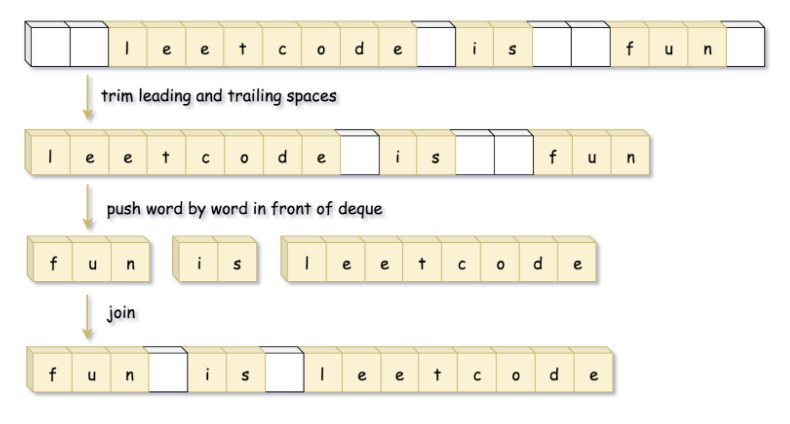

In [15]:
from collections import deque

def reverseWords(s):
    left, right = 0, len(s) - 1
    # remove leading spaces
    while left <= right and s[left] == ' ':
        left += 1

    # remove trailing spaces
    while left <= right and s[right] == ' ':
        right -= 1

    d = deque()
    word = []
    # push word by word in front of deque
    while left <= right:
        c = s[left]

        if len(word) != 0 and c == ' ':
            d.appendleft(''.join(word))
            word = []
        elif c != ' ':
            word.append(c)
        left += 1

    d.appendleft(''.join(word))

    return ' '.join(d)

In [16]:
s = "  the sky   is blue     "
reverseWords(s)

'blue is sky the'